## GENRE CLASSIFIER

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt 

# load data

dataset_path = "data_10.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp: # r for reading
        data = json.load(fp)
    
    # convert lists into numpy array because labels and mfccs are lists
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

"""Function to compare accuracy and loss"""

def plot_history(history):
    
    fig, axs = plt.subplots(2)
    
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "Train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "Test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc = "lower right")
    axs[0].set_title("Accuracy eval")
    
    # create loss subplot
    axs[1].plot(history.history["loss"], label = "Train loss")
    axs[1].plot(history.history["val_loss"], label = "Test loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc = "upper right")
    axs[1].set_title("Loss eval")
    
    fig.tight_layout() # creates space between subplots
    plt.show()
    


In [11]:
if __name__ == "__main__":
    
    # load data
    
    # inputs is a 3D array (segment #, mfcc 1 = interval, mfcc 2 = value)
    inputs, targets = load_data(dataset_path)
    
    # split data into training and test set with sklearn
    
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                              targets, 
                                                                              test_size = 0.3) # test set = 30%
    #return x_train, x_test, y_train, y_test

    # build the network architecture with keras
    model = keras.Sequential([
         
        # input layer
        keras.layers.Flatten(input_shape = (inputs.shape[1], inputs.shape[2])), # turns 2D array into a 1D array
        
        # 1st. hidden layer
        keras.layers.Dense(512, activation = "relu"), # ReLU activation function
         
         # 2nd. hidden layer
        keras.layers.Dense(256, activation = "relu"), # ReLU activation function
         
         # 3rd. hidden layer
        keras.layers.Dense(64, activation = "relu"), # ReLU activation function
         
        # output layers
        keras.layers.Dense(10, activation = "softmax") # 10 categories, softmax normalizes result to 0 - 1
    ])
    
    # compile
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001) # Adam = variation of SGD
    model.compile(optimizer = optimizer, 
                  loss = "sparse_categorical_crossentropy", # loss type depends on the type of task
                  metrics = ["accuracy"])
    
    model.summary()
    
    # train network
    
    """OVERFITTING:
    
    Can be spotted by comparing loss and accuracy of the train set and the test set."""
        
    # create the history variable to compare accuracy and loss
    history = model.fit(inputs_train, targets_train, 
              validation_data = (inputs_test, targets_test),
             epochs = 50,
             batch_size = 32) # batch_size defines the step at which the stochastic GD is performed

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1690)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               865792    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [==========================

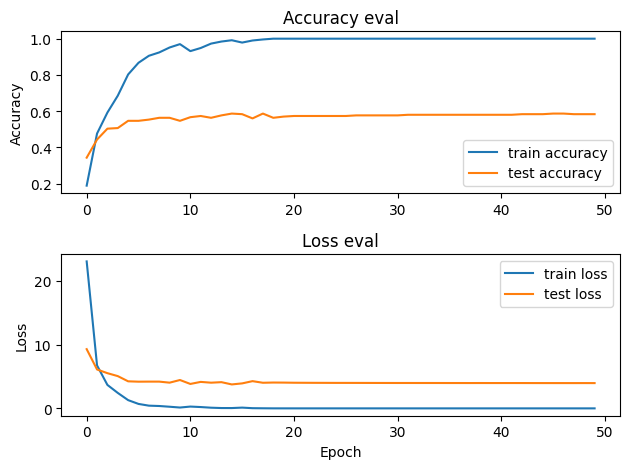

In [16]:
# EVALUATING OVERFITTING

# plot accuracy and loss
plot_history(history)

In [21]:
"""Implementing dropouts and regularization to solve overfitting."""
if __name__ == "__main__":
    
    # load data
    
    # inputs is a 3D array (segment #, mfcc 1 = interval, mfcc 2 = value)
    inputs, targets = load_data(dataset_path)
    
    # split data into training and test set with sklearn
    
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                              targets, 
                                                                              test_size = 0.3) # test set = 30%
    #return x_train, x_test, y_train, y_test

    # build the network architecture with keras
    model = keras.Sequential([
         
        # input layer
        keras.layers.Flatten(input_shape = (inputs.shape[1], inputs.shape[2])), # turns 2D array into a 1D array
        
        
        # ReLU activation function
        # Regularizer L2
        # Dropout technique drops out random neurons. Probability set to 0.3
        # Regularization set 
        
        # 1st. hidden layer
        keras.layers.Dense(512, activation = "relu", 
                           kernel_regularizer=keras.regularizers.L2(0.001)), 
        keras.layers.Dropout(0.3),
         
         # 2nd. hidden layer
        keras.layers.Dense(256, activation = "relu", 
                           kernel_regularizer=keras.regularizers.L2(0.001)), 
        keras.layers.Dropout(0.3),
         
         # 3rd. hidden layer
        keras.layers.Dense(64, activation = "relu", 
                           kernel_regularizer=keras.regularizers.L2(0.001)), 
        keras.layers.Dropout(0.3),
         
        # output layers
        keras.layers.Dense(10, activation = "softmax") # 10 categories, softmax normalizes result to 0 - 1
    ])
    
    # compile
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001) # Adam = variation of SGD
    model.compile(optimizer = optimizer, 
                  loss = "sparse_categorical_crossentropy", # loss type depends on the type of task
                  metrics = ["accuracy"])
    
    model.summary()
    
    # train network
    
    """OVERFITTING:
    
    Can be spotted by comparing loss and accuracy of the train set and the test set."""
        
    # create the history variable to compare accuracy and loss
    history = model.fit(inputs_train, targets_train, 
              validation_data = (inputs_test, targets_test),
             epochs = 50,
             batch_size = 32) # batch_size defines the step at which the stochastic GD is performed

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 1690)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)               

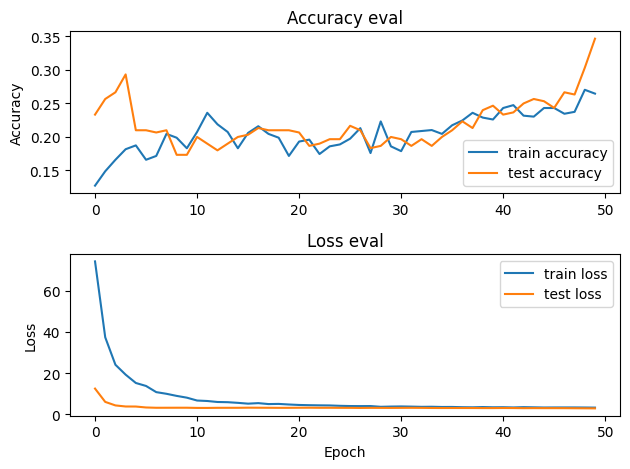

In [22]:
# EVALUATING OVERFITTING

# plot accuracy and loss
plot_history(history)